Loading package

In [2]:
library(ggplot2)
library(liger)
library(cowplot)
library(dplyr)
library("openxlsx")
library(scran)
library(biomaRt)
library(tibble)
library(AnnotationHub)
library(patchwork)
library(SingleR)
library(Seurat)
library(monocle3)
library(magrittr)
library(SeuratWrappers)
library(tidyverse)
library(viridis)
library(ggforce)
library(gghalves)
library(ggridges)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Loading required package: cowplot
Warning message:
"package 'cowplot' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"Loading required package: patchwork
Warning message:
"package 'patchwork' was built under R version 3.6.3"
Attaching package: 'patchwork'

The following object is masked from 'package:cowplot':

    align_plots

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching pa

In [4]:
custom_colors <- list()

colors_dutch <- c("#16a085", "#2980b9", "#4834d4", "#f39c12", "#c0392b",
                  "#130f40", "#f78fb3", "#65d6ce", "#d1c145", "#2ecc71",
                  "#d35400", "#c44569", '#ff7f50', '#706fd3', '#f9ca24',
                  '#34ace0', '#33d9b2', '#2c2c54', '#be2edd')

colors_spanish <- c(
  '#40407a','#706fd3','#f7f1e3','#34ace0','#33d9b2',
  '#2c2c54','#474787','#aaa69d','#227093','#218c74',
  '#ff5252','#ff793f','#d1ccc0','#ffb142','#ffda79',
  '#b33939','#cd6133','#84817a','#cc8e35','#ccae62'
)

custom_colors$discrete <- c(colors_dutch, colors_spanish)

custom_colors$cell_type <- c("#d35400", "#2980b9", "#8e44ad", "#f39c12", "#c0392b",
                              "#4cd137", "#f78fb3", "#65d6ce", "#d1c145", "#2ecc71",
                              "#16a085", "#c44569", '#ff7f50', '#706fd3', '#f9ca24',
                              '#34ace0', '#33d9b2', '#2c2c54', '#be2edd','#ccae62')

custom_colors$cell_cycle <- setNames(
  c('#45aaf2', '#f1c40f', '#e74c3c', '#7f8c8d'),
  c('G1',      'S',       'G2M',     '-')
)

In [5]:
microglia_merge<-readRDS("/home/adrien.dufour/NeuroDev_ADD/SingleCell/rds_storage/whole/microglia_merge.rds")

In [6]:
microglia_merge <- NormalizeData(microglia_merge)
microglia_merge <- FindVariableFeatures(microglia_merge)
microglia_merge <- ScaleData(microglia_merge, split.by = "SAMP", do.center = FALSE)
options(warn = -1)
microglia.integrated <- RunOptimizeALS(microglia_merge, k = 20, lambda = 5, split.by = "SAMP")
microglia.integrated <- RunQuantileNorm(microglia.integrated, split.by = "SAMP")
options(warn = 0)

Scaling data matrix
Scaling data from split P1-IL1a
Scaling data from split P1-IL1b
Scaling data from split P1-PBSa
Scaling data from split P1-PBSb
Scaling data from split P3-IL1a
Scaling data from split P3-IL1b
Scaling data from split P3-PBSa
Scaling data from split P3-PBSb
Scaling data from split P5-IL1a
Scaling data from split P5-IL1b
Scaling data from split P5-IL1c
Scaling data from split P5-IL1d
Scaling data from split P5-IL1e
Scaling data from split P5-IL1f
Scaling data from split P5-PBSa
Scaling data from split P5-PBSb
Scaling data from split P5-PBSc
Scaling data from split P5-PBSd
Scaling data from split P5-PBSe
Scaling data from split P5-PBSf


  |======================================================================| 100%
Finished in 11.90975 mins, 30 iterations.
Max iterations set: 30.
Final objective delta: 1.111138e-05.
Best results with seed 1.


In [ ]:
microglia.integrated <- RunPCA(microglia.integrated, npcs = 50, verbose = FALSE)

In [8]:
microglia.integrated <- RunUMAP(microglia.integrated, reduction = "pca", dims = 1:15)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"13:37:57 UMAP embedding parameters a = 0.9922 b = 1.112
13:37:57 Read 47211 rows and found 15 numeric columns
13:37:57 Using Annoy for neighbor search, n_neighbors = 30
13:37:57 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
13:38:02 Writing NN index file to temp file /tmp/RtmpQrZ9y6/file710c51334f97
13:38:02 Searching Annoy index using 1 thread, search_k = 3000
13:38:22 Annoy recall = 100%
13:38:23 Commencing smooth kNN distance calibration using 1 thread
13:38:27 Initializing from normalized Laplacian + noise
13:38:32 Commencing optimizati

In [9]:
microglia.integrated <- FindNeighbors(microglia.integrated, reduction = "pca", dims = 1:15)

Computing nearest neighbor graph
Computing SNN


In [10]:
microglia.integrated <- FindClusters(microglia.integrated, resolution = 0.3)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 47211
Number of edges: 1270159

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9022
Number of communities: 12
Elapsed time: 13 seconds


Warning message:
"Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session."

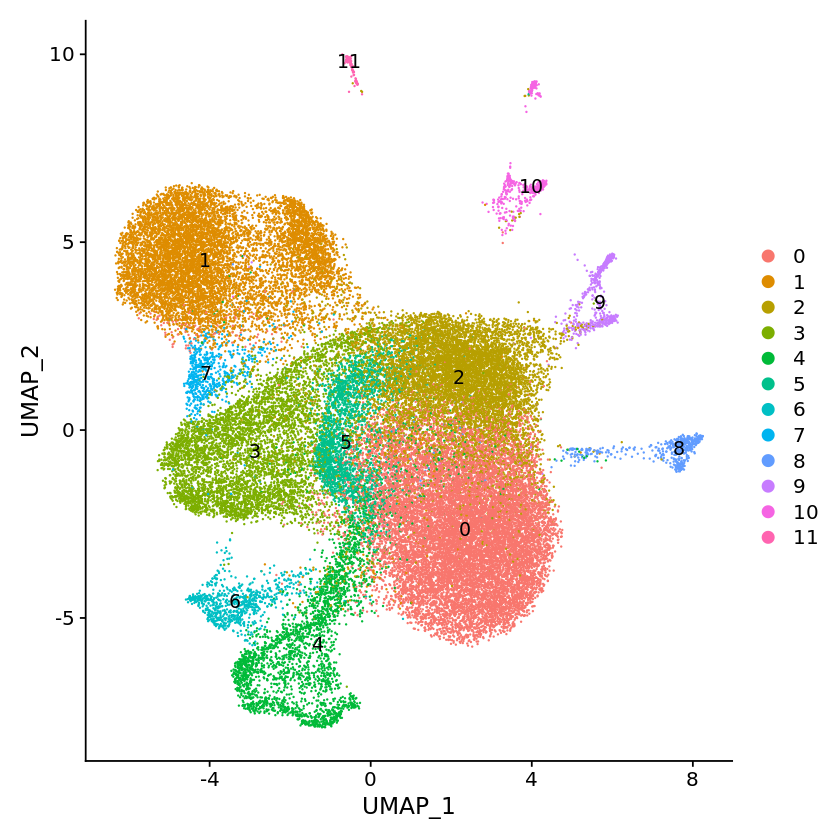

In [11]:
DimPlot(microglia.integrated, reduction = "umap", label = TRUE)

In [ ]:
saveRDS(microglia.integrated, "/home/adrien.dufour/NeuroDev_ADD/SingleCell/rds_storage/whole/microglia.rds")